In [1]:
from video import *
import numpy as np
from utils import *

In [2]:
video_a = load_video("train/task1/15_reference.mp4")
video_c = load_video("train/task1/15_query.mp4")

In [3]:
c = video_c.get_frame(160).raw()
a = video_a.get_frame(1410).raw()

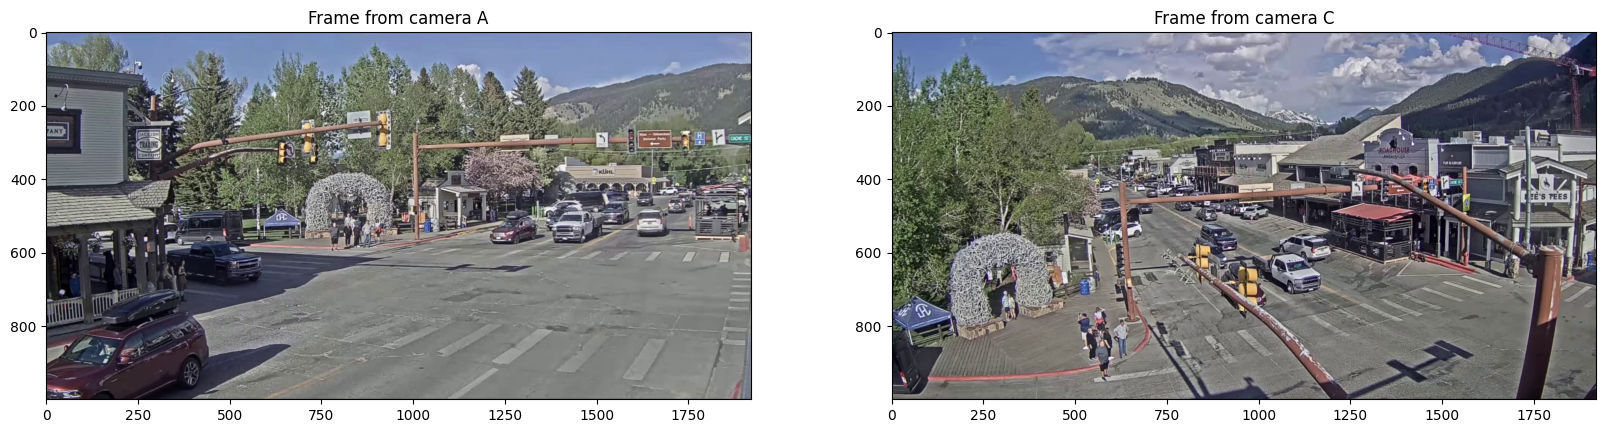

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].set_title("Frame from camera A")
axs[0].imshow(a)
axs[1].set_title("Frame from camera C")
axs[1].imshow(c)
plt.show()

In [5]:
cv.imwrite("correspondences/camera_a.png", cv.cvtColor(a, cv.COLOR_RGB2BGR))
cv.imwrite("correspondences/camera_c.png", cv.cvtColor(c, cv.COLOR_RGB2BGR))

True

In [6]:
coordinates_a = np.array(
    [
        [1708, 583],
        [1241, 613],
        [1656, 611],
        [1349, 599],
        [629, 594],
        [1008, 570],
        [890, 566],
        [1332, 662],
        [1517, 680],
        [1276, 653],
        [1108, 649],
        [1869, 676],
        [1678, 686],
        [1699, 697],
        [1638, 531],
        [1555, 507],
        [705, 565],
        [1292, 713],
        [1197, 671],
        [944, 612],
    ]
)

coordinates_c = np.array(
    [
        [1372, 668],
        [1235, 831],
        [1513, 715],
        [1216, 766],
        [327, 994],
        [657, 787],
        [476, 801],
        [1650, 885],
        [1691, 798],
        [1584, 880],
        [1457, 943],
        [1847, 736],
        [1839, 787],
        [1876, 790],
        [1011, 581],
        [821, 563],
        [211, 839],
        [1875, 921],
        [1644, 928],
        [975, 942],
    ]
)

F, mask = cv.findHomography(coordinates_a, coordinates_c)
print(F)
print(mask)
Finv, mask = cv.findHomography(coordinates_c, coordinates_a)
print(Finv)
print(mask)

[[     -4.734     -25.259       17296]
 [   -0.76251     -7.9624      3239.4]
 [ -0.0020016  -0.0028567           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[    0.82196     -1.7032      4155.6]
 [   -0.14479      2.8583     -238.45]
 [-0.00067971   0.0035915           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'Camera C')

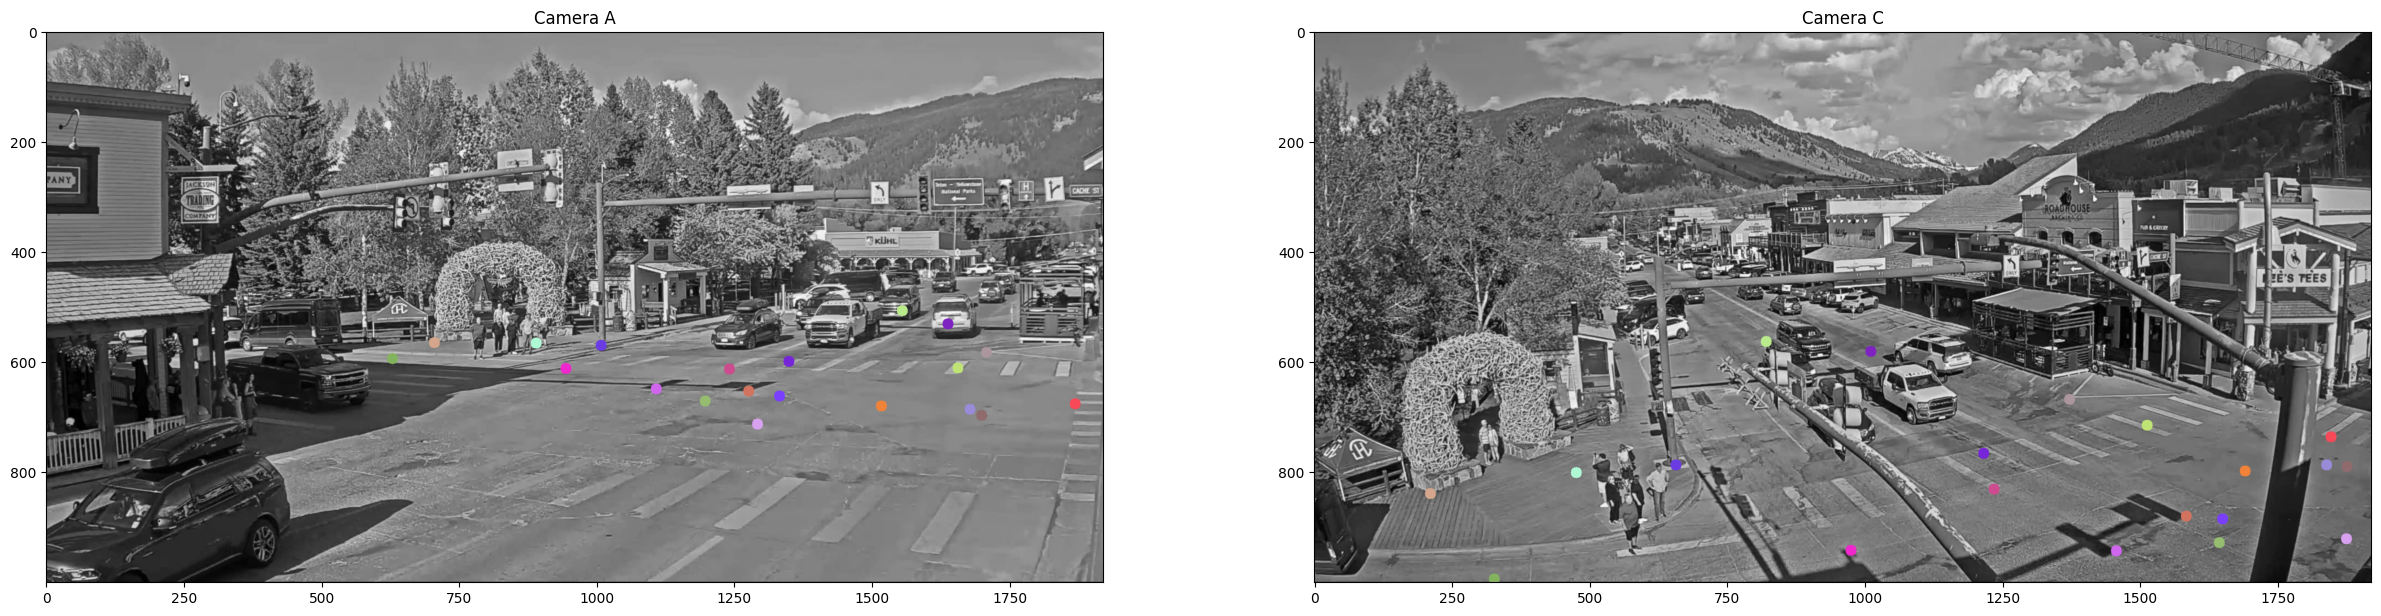

In [7]:
a_points = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
c_points = cv.cvtColor(cv.cvtColor(np.copy(c), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

colors = [np.random.randint([100, 30, 50], [255, 255, 255]).tolist() for _ in range(len(coordinates_c))]
for i in range(len(coordinates_a)):
    cv.circle(a_points, tuple(coordinates_a[i]), 10, colors[i], -1)
    cv.circle(c_points, tuple(coordinates_c[i]), 10, colors[i], -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(a_points)
ax[0].set_title("Camera A")
ax[1].imshow(c_points)
ax[1].set_title("Camera C")

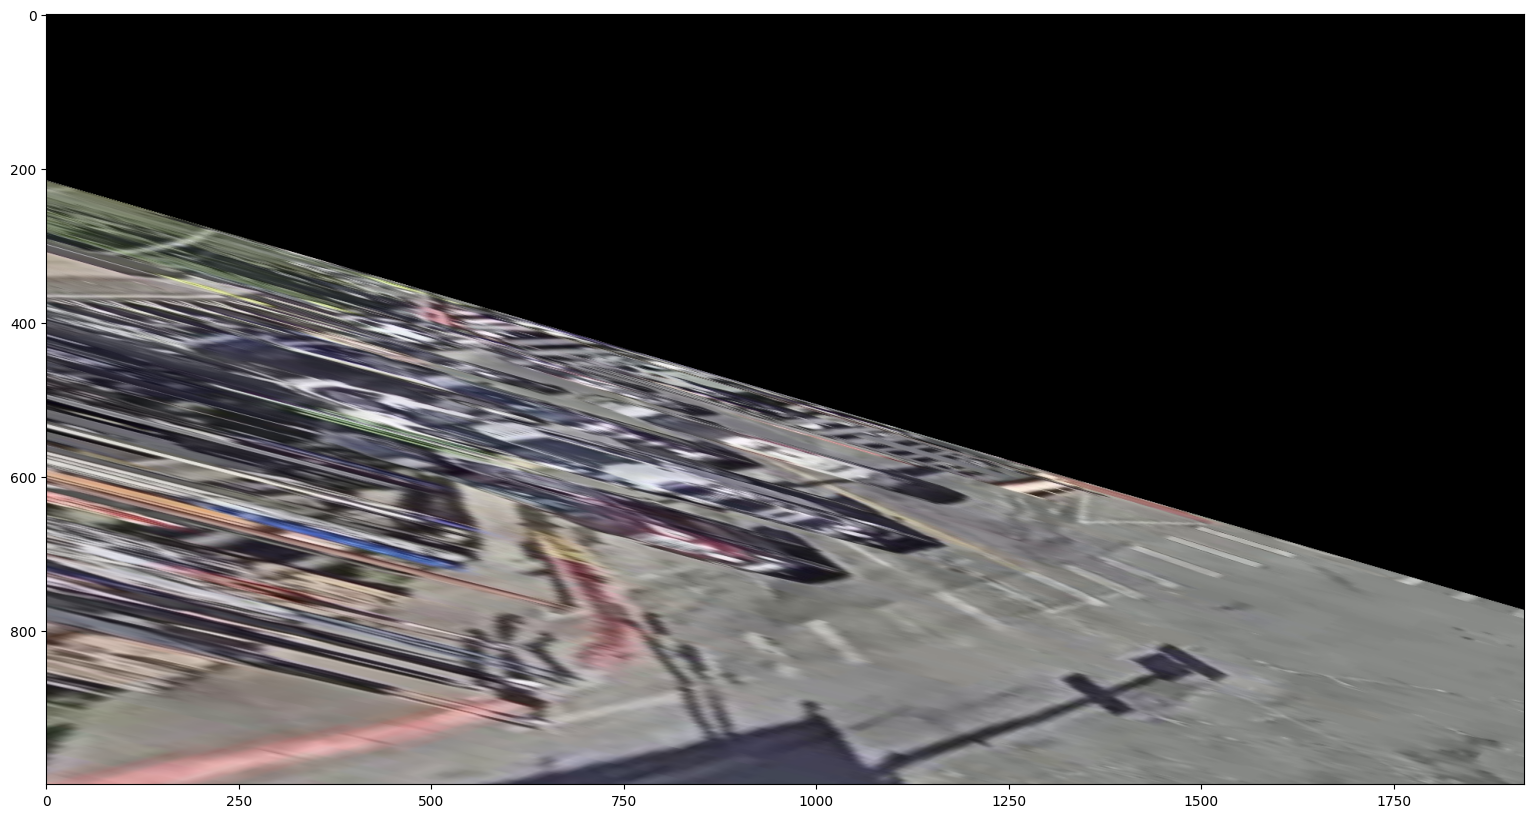

In [8]:
warped = cv.warpPerspective(a, F, (a.shape[1], a.shape[0]))

plt.figure(figsize=(20, 10))
plt.imshow(warped)

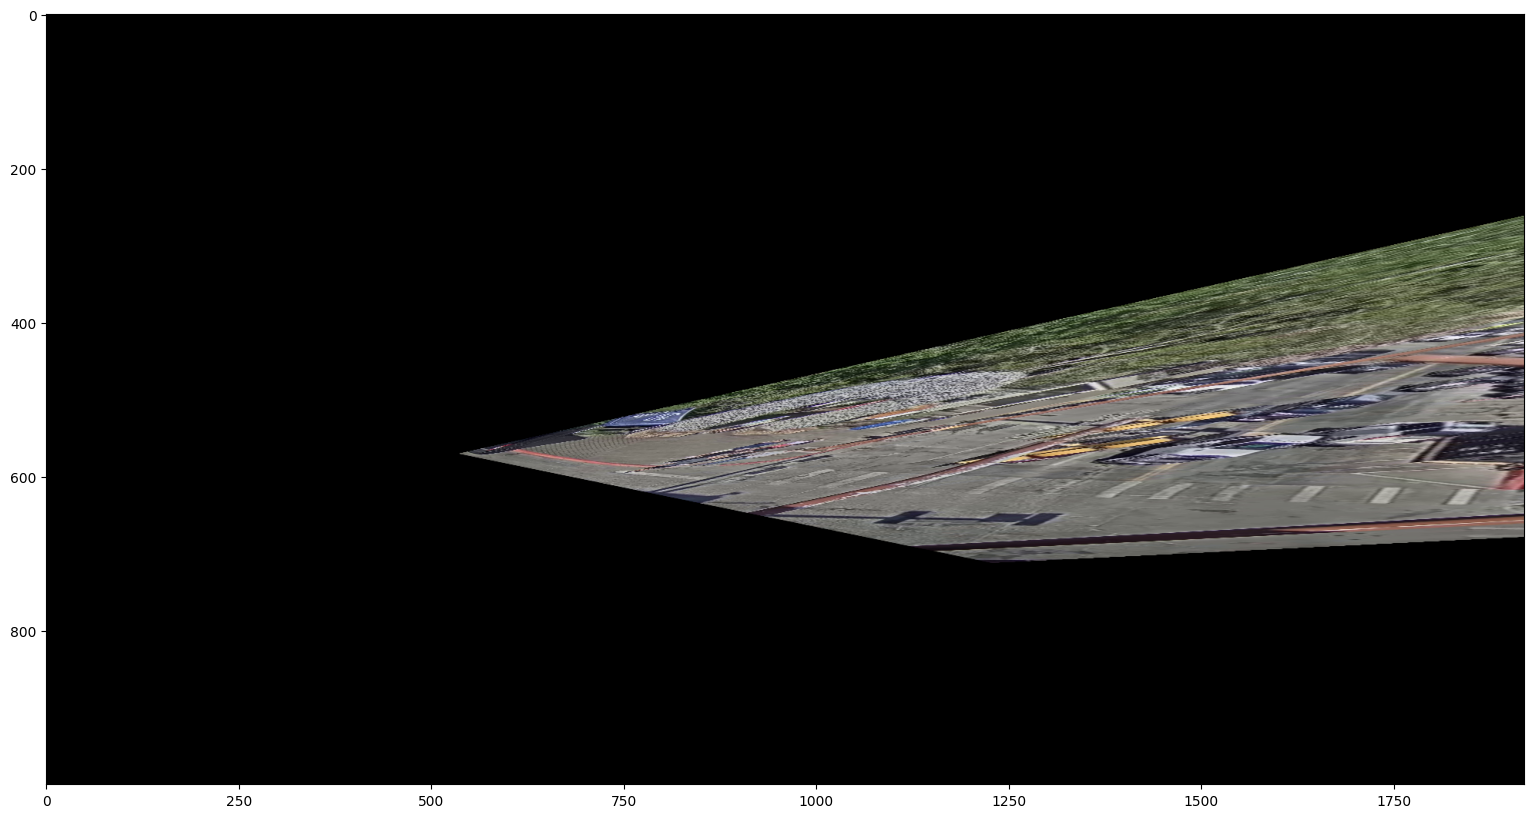

In [9]:
warped = cv.warpPerspective(c, Finv, (c.shape[1], c.shape[0]))

plt.figure(figsize=(20, 10))
plt.imshow(warped)

[[1918  979]]


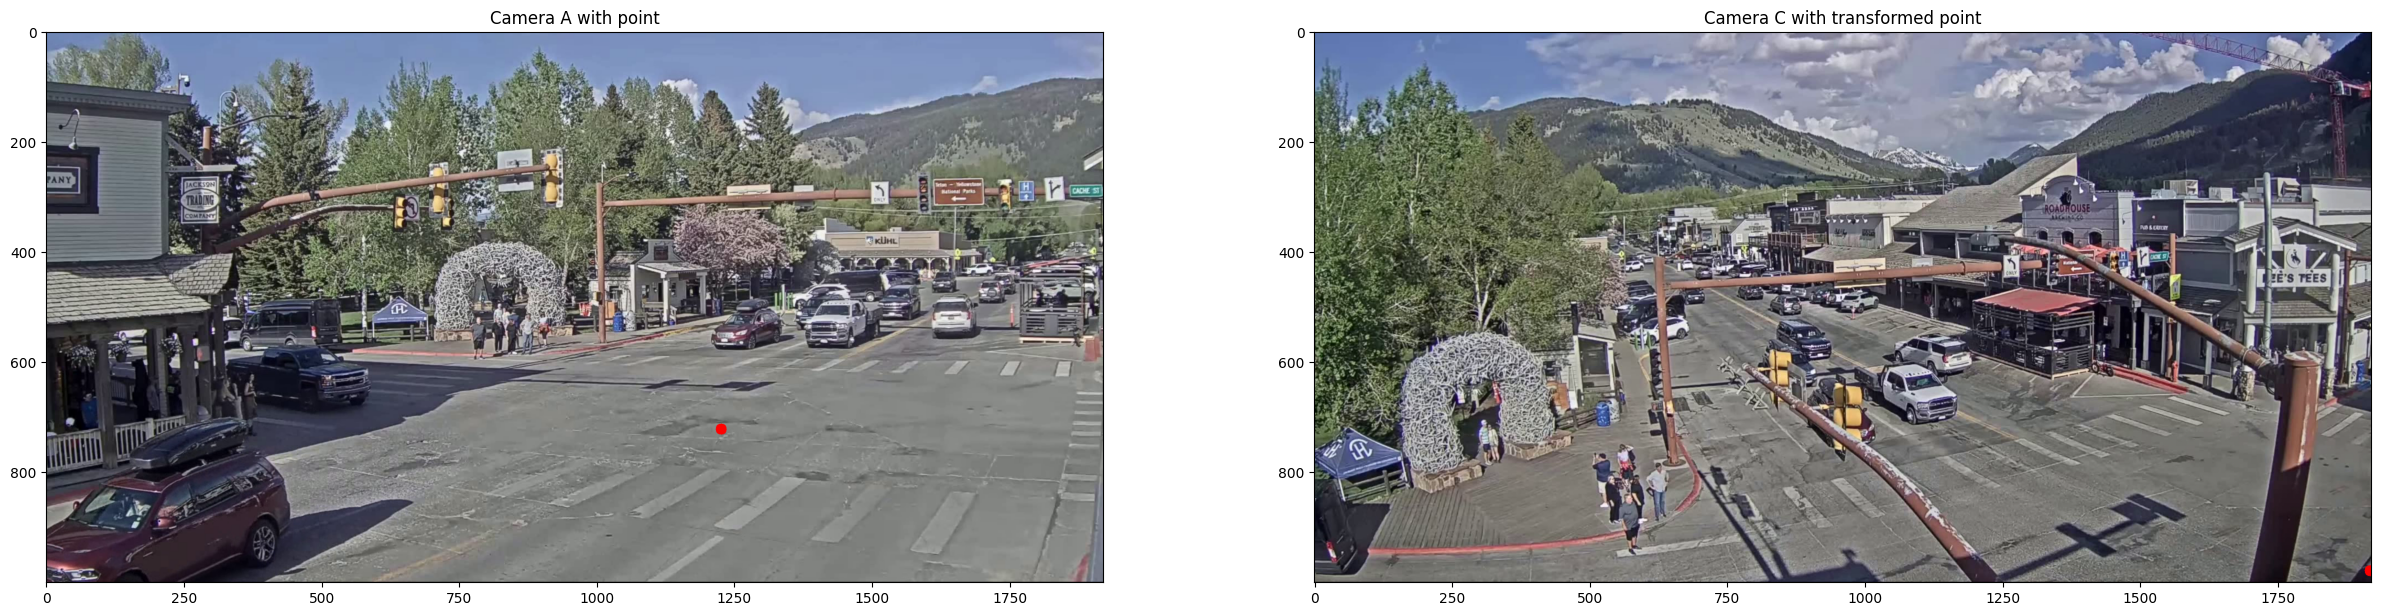

In [19]:
# Transform the points from camera A to camera B

points_to_transform = np.array([
    [1226, 722],
])
transformed_points = cv.perspectiveTransform(points_to_transform.reshape(-1, 1, 2).astype(np.float32), F)[0].astype(int)
print(transformed_points)

a_copy = a.copy()
c_copy = c.copy()

cv.circle(a_copy, points_to_transform[0], 10, (255, 0, 0), -1)

# Draw the transformed points on the warped image
for i in range(len(transformed_points)):
    cv.circle(c_copy, transformed_points[i], 10, (255, 0, 0), -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(a_copy)
ax[0].set_title("Camera A with point")
ax[1].imshow(c_copy)
ax[1].set_title("Camera C with transformed point")
plt.show()

[[943 546]]


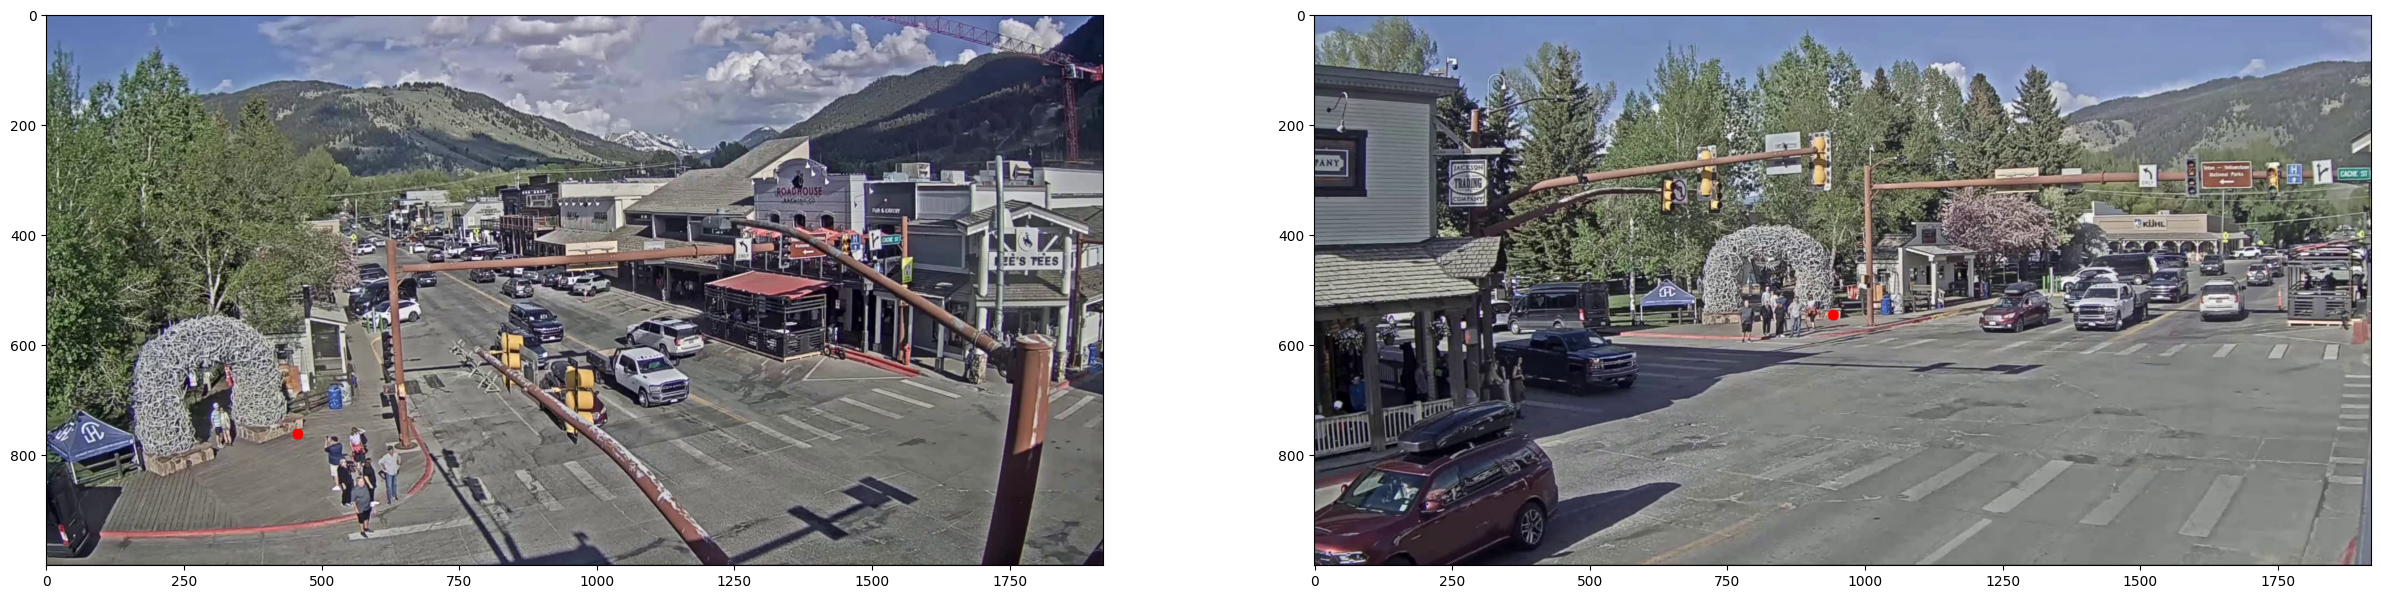

In [20]:
points_to_transform = np.array([
    [457, 762],
])
transformed_points = cv.perspectiveTransform(points_to_transform.reshape(-1, 1, 2).astype(np.float32), Finv)[0].astype(int)
print(transformed_points)

a_copy = a.copy()
c_copy = c.copy()

cv.circle(c_copy, points_to_transform[0], 10, (255, 0, 0), -1)

# Draw the transformed points on the warped image
for i in range(len(transformed_points)):
    cv.circle(a_copy, transformed_points[i], 10, (255, 0, 0), -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(c_copy)
ax[1].imshow(a_copy)
plt.show()

In [105]:
np.save("homography_matrices/AC.npy", F)
np.save("homography_matrices/CA.npy", Finv)